In [1]:
import pandas as pd
import operator
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score


# Programa 1

In [2]:
df = pd.read_csv('datos.csv')
df

,x,y
0,-3.292157,-44.608971
1,-0.936214,0.623178
2,-3.602674,-58.873048
3,-0.850265,-6.057589
4,2.309657,-3.967128
...,...,...
95,5.878571,36.139165
96,2.117848,-8.607422
97,0.430170,-3.414761
98,-0.315372,-1.059461


In [3]:
x = df['x'].values
y = df['y'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle= True, random_state=0)

In [4]:
def metricas(reg, x_test, y_test):
    pred = reg.predict(x_test.reshape(-1,1))
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    return mse, r2

In [5]:
def graficas(x_test, y_test, y_pred, title):
    plt.scatter(x_test, y_test, color='blue', label='Datos de prueba')
    plt.plot(x_test, y_pred, color='red', label='Predicción')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()
    plt.show()

In [6]:
def regLyPoly(x_train, y_train, x_test, y_test, alpha, iteraciones):
    grados = [2, 3] 
    regresionL = LinearRegression()
    regresionL.fit(x_train.reshape(-1,1), y_train)
    regresionL_OLSmse, regresionL_OLSr2 = metricas(regresionL, x_test, y_test)
    print(f'Regresion Lineal OLS - MSE:{regresionL_OLSmse} - R2:{regresionL_OLSr2}') 
    graficas(x_test, y_test, regresionL.predict(x_test.reshape(-1,1)), 'Regresión Lineal OLS')
    
    regresionLSGD = SGDRegressor(learning_rate='constant', eta0=alpha, max_iter=iteraciones)
    regresionLSGD.fit(x_train.reshape(-1,1), y_train)
    regresionLSGDmse, regresionLSGDr2 = metricas(regresionLSGD, x_test, y_test)
    print(f'Regresion Lineal SGD - MSE:{regresionLSGDmse} - R2:{regresionLSGDr2}') 
    graficas(x_test, y_test, regresionLSGD.predict(x_test.reshape(-1,1)), 'Regresión Lineal SGD')
    
    for grado in grados:
        regresionPoly_OLS = make_pipeline(PolynomialFeatures(degree=grado), LinearRegression())
        regresionPoly_OLS.fit(x_train.reshape(-1,1), y_train)  
        mse_OLS, r2_OLS = metricas(regresionPoly_OLS, x_test, y_test)
        print(f'Regresion polinomica de grado {grado} con OLS - MSE:{mse_OLS} - R2:{r2_OLS}')
        sorted_indices = np.argsort(x_test)
        graficas(x_test[sorted_indices],
                 y_test[sorted_indices], 
                 regresionPoly_OLS.predict(x_test[sorted_indices].reshape(-1,1)), 
                 f'Regresión Poli de grado {grado} OLS')
        
        regresionPoly_SGD = make_pipeline(PolynomialFeatures(degree=grado), SGDRegressor(learning_rate='constant', eta0=alpha, max_iter=iteraciones))
        regresionPoly_SGD.fit(x_train.reshape(-1,1), y_train)  
        mse_SGD, r2_SGD = metricas(regresionPoly_SGD, x_test, y_test)
        print(f'Regresion poli de grado {grado} con SGD - MSE:{mse_SGD} - R2:{r2_SGD}')  
        graficas(x_test[sorted_indices], 
                y_test[sorted_indices], 
                regresionPoly_SGD.predict(x_test[sorted_indices].reshape(-1,1)), 
                f'Regresión Poli de grado {grado} con SGD')

Regresion Lineal OLS - MSE:296.0945867766399 - R2:0.7198048208163852


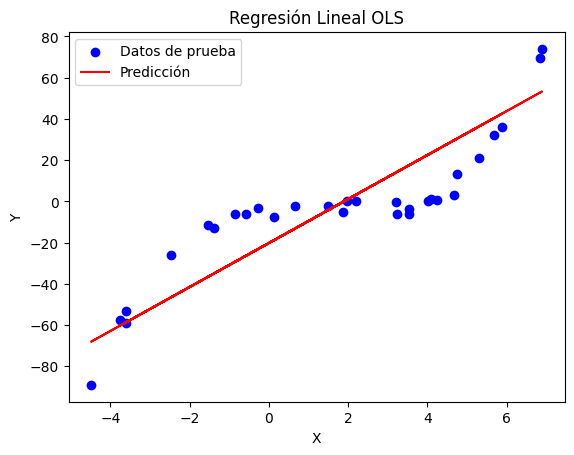

c:\Users\arman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Regresion Lineal SGD - MSE:554.9632893643507 - R2:0.4748366054355697


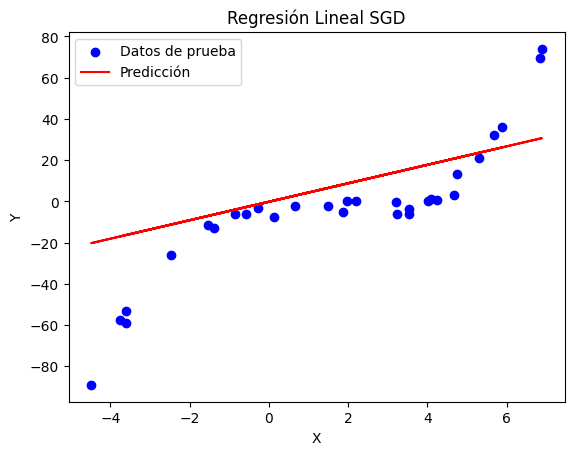

Regresion polinomica de grado 2 con OLS - MSE:352.43738401011177 - R2:0.6664874659184123


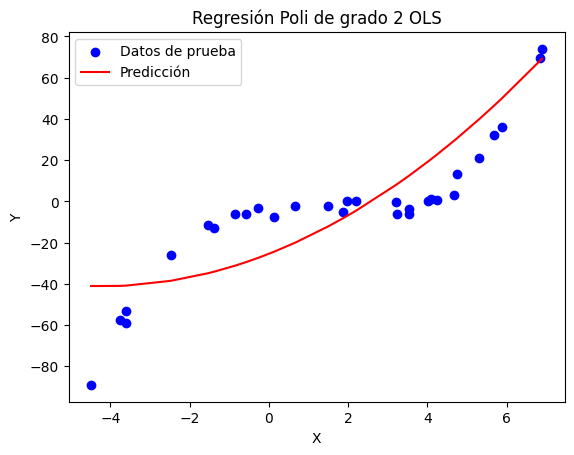

c:\Users\arman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Regresion poli de grado 2 con SGD - MSE:872.4346985890571 - R2:0.1744124762349435


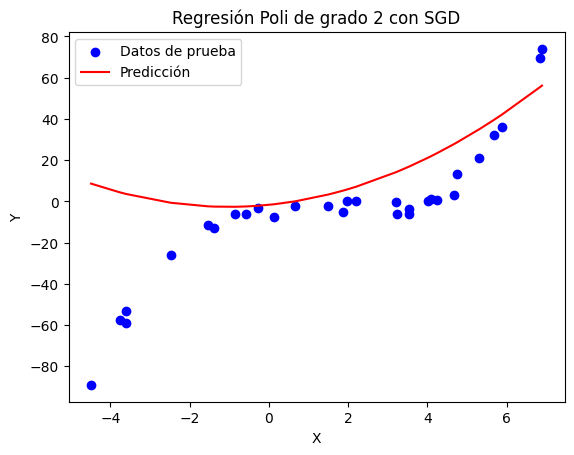

Regresion polinomica de grado 3 con OLS - MSE:8.487854131822635 - R2:0.9919679186464004


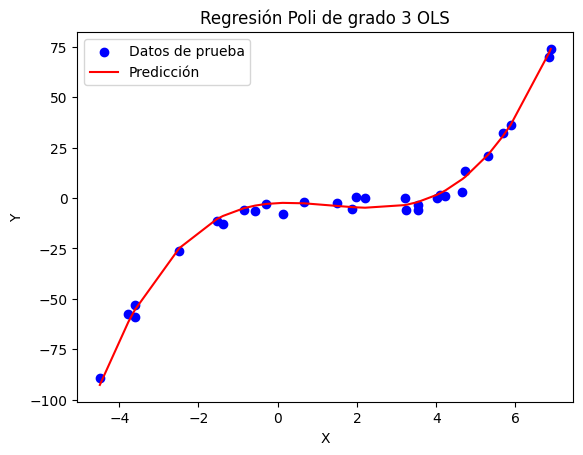

Regresion poli de grado 3 con SGD - MSE:16.005570466167203 - R2:0.9848538815466872


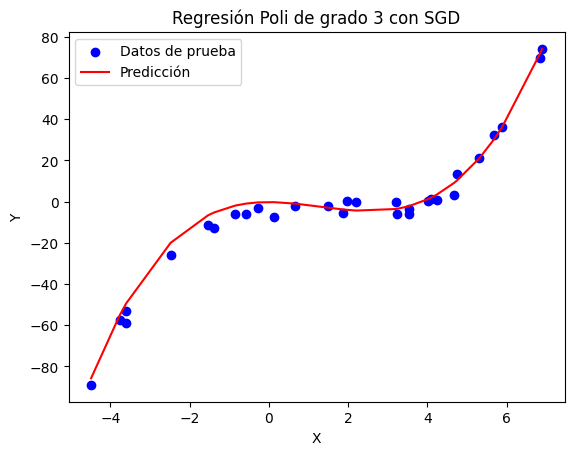

In [7]:
regLyPoly(x_train, y_train, x_test, y_test, 0.0000001, 10000)